In [1]:
""" This File is our baseline tool for getting the Open, High, Low, Close, Volume for BTC.
    It uses Binance API and creates DataFrames for further data manipulation and TA.
    We will use this for the Logistic Regression."""
from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager
import pandas as pd
import mplfinance as mpl
import os
import numpy as np
from hvplot import hvPlot
import pandas as pd
from ta import add_all_ta_features
from ta.utils import dropna
import pandas_ta as ta
from finta import TA

In [2]:
pip install pandas_ta

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install --upgrade ta

Note: you may need to restart the kernel to use updated packages.


In [4]:
api_key = os.environ.get("api_key")
api_secret = os.environ.get("api_secret")

In [5]:
client = Client(api_key, api_secret)

In [6]:
tickers = client.get_all_tickers()

In [7]:
#tickers()

In [8]:
#tickers[1]['price']


In [9]:
ticker_df = pd.DataFrame(tickers)

In [10]:
#ticker_df.head()

In [11]:
#ticker_df.tail()

In [12]:
ticker_df.set_index('symbol', inplace=True)

In [13]:
float(ticker_df.loc['ETHUSDC']['price'])
float(ticker_df.loc['BTCUSDT']['price'])

54072.98

In [14]:
# Get Depth
depth = client.get_order_book(symbol='BTCUSDT')

In [15]:
# depth

In [16]:
depth_df = pd.DataFrame(depth['asks'])
depth_df.columns = ['Price', 'Volume']
depth_df.head()

,Price,Volume
0,54073.78000000,0.02773000
1,54078.19000000,0.10320000
2,54078.20000000,0.01000000
3,54078.25000000,0.01724000
4,54078.62000000,0.01495000


In [17]:
depth_df.dtypes

Price     object
Volume    object
dtype: object

In [18]:
# client.get_historical_klines()

In [19]:
# BTC Minute Data from past day
historical_df = client.get_historical_klines('BTCUSDC', Client.KLINE_INTERVAL_1MINUTE, '1 day ago UTC')

In [20]:
hist_df = pd.DataFrame(historical_df)

In [21]:
# Function to get list of OHLCV Values
#def getminutedata(symbol, interval, lookback)

In [22]:
hist_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1633623840000,53739.40000000,53830.50000000,53739.40000000,53830.50000000,0.54393000,1633623899999,29261.81743680,41,0.31699000,17053.25413390,0
1,1633623900000,53832.90000000,53889.55000000,53820.82000000,53874.39000000,0.80662000,1633623959999,43445.86537160,76,0.65730000,35404.73969370,0
2,1633623960000,53856.66000000,53890.97000000,53847.29000000,53884.58000000,2.21680000,1633624019999,119409.08598020,45,1.38489000,74608.39870610,0
3,1633624020000,53884.49000000,53917.52000000,53866.92000000,53905.93000000,0.51818000,1633624079999,27930.97911570,28,0.11322000,6101.78302690,0
4,1633624080000,53889.95000000,53935.08000000,53889.95000000,53935.08000000,0.36129000,1633624139999,19479.45855240,37,0.15230000,8210.97823090,0


In [23]:
hist_df.columns = ['Open Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close Time', 'Quote Asset Volume', 
                    'Number of Trades', 'TB Base Volume', 'TB Quote Volume', 'Ignore']

In [24]:
hist_df.tail()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
1435,1633709940000,54178.08000000,54178.08000000,54143.80000000,54159.67000000,0.41905000,1633709999999,22692.71097190,13,0.19506000,10563.13485840,0
1436,1633710000000,54147.15000000,54147.15000000,54145.74000000,54145.74000000,0.06013000,1633710059999,3255.79005780,2,0.00476000,257.74043400,0
1437,1633710060000,54143.98000000,54163.53000000,54143.16000000,54163.53000000,0.18465000,1633710119999,9998.35637250,15,0.03549000,1922.12131440,0
1438,1633710120000,54145.75000000,54145.75000000,54071.91000000,54071.91000000,8.44112000,1633710179999,456694.24847800,132,0.36632000,19820.91610500,0
1439,1633710180000,54071.91000000,54102.54000000,54055.27000000,54088.29000000,4.27456000,1633710239999,231191.41775830,85,2.06362000,111611.96803570,0


In [25]:
hist_df.shape

(1440, 12)

In [26]:
hist_df.dtypes

Open Time              int64
Open                  object
High                  object
Low                   object
Close                 object
Volume                object
Close Time             int64
Quote Asset Volume    object
Number of Trades       int64
TB Base Volume        object
TB Quote Volume       object
Ignore                object
dtype: object

In [27]:
hist_df['Open Time'] = pd.to_datetime(hist_df['Open Time']/1000, unit='s')
hist_df['Close Time'] = pd.to_datetime(hist_df['Close Time']/1000, unit='s')

In [28]:
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Quote Asset Volume', 'TB Base Volume', 'TB Quote Volume']

In [29]:
hist_df[numeric_columns] = hist_df[numeric_columns].apply(pd.to_numeric, axis=1)

In [30]:
hist_df.tail()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
1435,2021-10-08 16:19:00,54178.08,54178.08,54143.80,54159.67,0.41905,2021-10-08 16:19:59.999000064,22692.710972,13,0.19506,10563.134858,0
1436,2021-10-08 16:20:00,54147.15,54147.15,54145.74,54145.74,0.06013,2021-10-08 16:20:59.999000064,3255.790058,2,0.00476,257.740434,0
1437,2021-10-08 16:21:00,54143.98,54163.53,54143.16,54163.53,0.18465,2021-10-08 16:21:59.999000064,9998.356373,15,0.03549,1922.121314,0
1438,2021-10-08 16:22:00,54145.75,54145.75,54071.91,54071.91,8.44112,2021-10-08 16:22:59.999000064,456694.248478,132,0.36632,19820.916105,0
1439,2021-10-08 16:23:00,54071.91,54102.54,54055.27,54088.29,4.27456,2021-10-08 16:23:59.999000064,231191.417758,85,2.06362,111611.968036,0


In [31]:
hist_df.dtypes


Open Time             datetime64[ns]
Open                         float64
High                         float64
Low                          float64
Close                        float64
Volume                       float64
Close Time            datetime64[ns]
Quote Asset Volume           float64
Number of Trades               int64
TB Base Volume               float64
TB Quote Volume              float64
Ignore                        object
dtype: object

In [32]:
hist_df.describe()


,Open,High,Low,Close,Volume,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume
count,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1.440000e+03,1440.000000,1440.000000,1440.000000
mean,54388.257278,54415.593194,54361.017306,54387.653111,0.884857,4.836206e+04,29.134722,0.430130,23515.679578
std,556.451246,562.161866,550.525709,555.628281,1.730432,9.516938e+04,46.081762,0.954382,52512.129439
min,53647.200000,53718.910000,53600.000000,53650.000000,0.001260,6.826644e+01,1.000000,0.000000,0.000000
25%,53978.562500,54011.885000,53955.942500,53980.667500,0.129675,7.009584e+03,11.000000,0.040705,2208.853365
50%,54188.985000,54208.370000,54166.670000,54189.595000,0.349955,1.908790e+04,18.000000,0.133720,7235.680111
75%,54624.457500,54663.985000,54595.332500,54623.180000,0.855225,4.649125e+04,32.000000,0.389327,21201.104797
max,55964.050000,56150.900000,55860.590000,55996.220000,21.937500,1.217839e+06,874.000000,14.128110,784166.061172


In [33]:
hist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Open Time           1440 non-null   datetime64[ns]
 1   Open                1440 non-null   float64       
 2   High                1440 non-null   float64       
 3   Low                 1440 non-null   float64       
 4   Close               1440 non-null   float64       
 5   Volume              1440 non-null   float64       
 6   Close Time          1440 non-null   datetime64[ns]
 7   Quote Asset Volume  1440 non-null   float64       
 8   Number of Trades    1440 non-null   int64         
 9   TB Base Volume      1440 non-null   float64       
 10  TB Quote Volume     1440 non-null   float64       
 11  Ignore              1440 non-null   object        
dtypes: datetime64[ns](2), float64(8), int64(1), object(1)
memory usage: 135.1+ KB


In [34]:
# Technical Analysis
import mplfinance as mpf

In [35]:
hist_df.set_index('Close Time').tail(100)

,Open Time,Open,High,Low,Close,Volume,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
Close Time,,,,,,,,,,,
2021-10-08 14:44:59.999000064,2021-10-08 14:44:00,54623.70,54771.72,54582.94,54666.46,5.75681,314757.502643,148,2.78931,152504.033974,0
2021-10-08 14:45:59.999000064,2021-10-08 14:45:00,54666.87,54699.26,54613.92,54613.92,0.54043,29549.378121,21,0.23077,12618.362370,0
2021-10-08 14:46:59.999000064,2021-10-08 14:46:00,54618.58,54630.48,54581.73,54630.48,1.80242,98440.051546,34,1.20459,65797.561285,0
2021-10-08 14:47:59.999000064,2021-10-08 14:47:00,54561.74,54591.62,54561.74,54565.35,0.46161,25192.675497,18,0.26988,14730.157554,0
2021-10-08 14:48:59.999000064,2021-10-08 14:48:00,54571.93,54572.13,54542.72,54542.72,0.34561,18854.047620,14,0.05858,3196.581866,0
...,...,...,...,...,...,...,...,...,...,...,...
2021-10-08 16:19:59.999000064,2021-10-08 16:19:00,54178.08,54178.08,54143.80,54159.67,0.41905,22692.710972,13,0.19506,10563.134858,0
2021-10-08 16:20:59.999000064,2021-10-08 16:20:00,54147.15,54147.15,54145.74,54145.74,0.06013,3255.790058,2,0.00476,257.740434,0
2021-10-08 16:21:59.999000064,2021-10-08 16:21:00,54143.98,54163.53,54143.16,54163.53,0.18465,9998.356373,15,0.03549,1922.121314,0


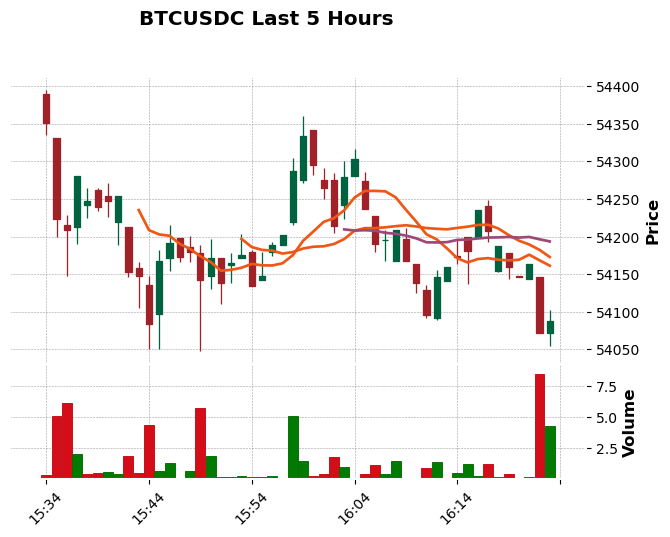

In [36]:
mpf.plot(hist_df.set_index('Close Time').tail(50), 
        type='candle', style='charles', 
        volume=True, 
        title='BTCUSDC Last 5 Hours', 
        mav=(10,20,30))

In [37]:
""" Daily Data from 2021 
use the client.get_historical_klines function and input symbol, interval, and start date.
End date is left out becaues we want current data """

btc_daily_data = client.get_historical_klines('BTCUSDC', Client.KLINE_INTERVAL_1DAY, '1 Jan 2021')

In [38]:
btc_daily_df = pd.DataFrame(btc_daily_data)

In [39]:
btc_daily_df.columns = ['Open Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close Time', 'Quote Asset Volume', 
                    'Number of Trades', 'TB Base Volume', 'TB Quote Volume', 'Ignore']

In [40]:
btc_daily_df['Open Time'] = pd.to_datetime(btc_daily_df['Open Time']/1000, unit='s')
btc_daily_df['Close Time'] = pd.to_datetime(btc_daily_df['Close Time']/1000, unit='s')

In [41]:
numeric_columns_d = ['Open', 'High', 'Low', 'Close', 'Volume', 'Quote Asset Volume', 'TB Base Volume', 'TB Quote Volume']

In [42]:
btc_daily_df[numeric_columns] = btc_daily_df[numeric_columns].apply(pd.to_numeric, axis=1)

In [43]:
btc_daily_df.describe()

,Open,High,Low,Close,Volume,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume
count,281.000000,281.000000,281.000000,281.000000,281.000000,2.810000e+02,281.000000,281.000000,2.810000e+02
mean,44652.599573,46199.518612,42925.475267,44740.918434,2755.172773,1.182107e+08,57261.323843,1349.572508,5.790734e+07
std,9044.379069,9130.279344,8981.543337,9013.084876,1525.433432,5.812254e+07,24198.001178,763.546808,2.935281e+07
min,28964.540000,29680.000000,28000.000000,29407.930000,709.605070,3.442800e+07,19629.000000,329.246880,1.588396e+07
25%,35928.270000,37920.310000,34375.420000,35991.670000,1840.435567,8.384192e+07,43355.000000,880.358958,4.007128e+07
50%,45178.970000,46900.000000,43762.790000,45215.210000,2377.183358,1.081952e+08,51968.000000,1170.465357,5.207091e+07
75%,51581.010000,53529.370000,49318.790000,51736.970000,3248.982775,1.375055e+08,66729.000000,1595.493114,6.843147e+07
max,63583.850000,64882.470000,62032.950000,63554.560000,13553.429477,5.128652e+08,226279.000000,6347.727851,2.410801e+08


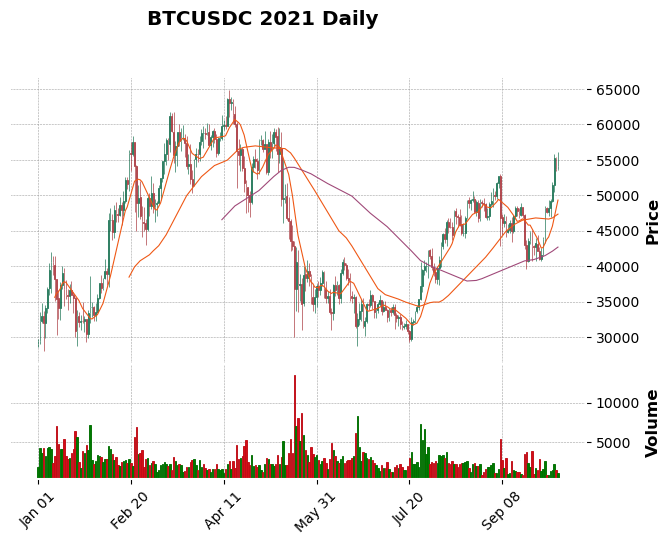

In [44]:
mpf.plot(btc_daily_df.set_index('Close Time').tail(284), 
        type='candle', style='charles', 
        volume=True, 
        title='BTCUSDC 2021 Daily ', 
        mav=(10,50,100))

In [45]:
# Just get the Open Time, Open, High, Low, Close, Volume
btc_ohlcv_daily = btc_daily_df.iloc[:,0:6]
btc_ohlcv_minute = hist_df.iloc[:,0:6]

In [46]:
# CSV SAVER TOOL For Saving Bitcoin data to CSVs to use for LSTM
btc_ohlcv_daily.to_csv('btc_daily_lstm', index=False)
btc_ohlcv_minute.to_csv('btc_minutelstm', index=False)

In [47]:
btc_ohlcv_daily = btc_ohlcv_daily.set_index('Open Time')
btc_ohlcv_minute = btc_ohlcv_minute.set_index('Open Time')

In [48]:
# Display of Daily Bitcoin DF to use for TA and Machine Leaning
display(btc_ohlcv_daily.head())
display(btc_ohlcv_minute.tail())

,Open,High,Low,Close,Volume
Open Time,,,,,
2021-01-01,28964.54,29680.00,28608.73,29407.93,1736.620480
2021-01-02,29393.99,33500.00,29027.03,32215.18,4227.234681
2021-01-03,32216.13,34851.30,32002.65,33033.26,3523.881120
2021-01-04,33040.00,33648.27,28000.00,32017.58,4218.572357
2021-01-05,32027.11,34498.00,29882.30,34059.70,3150.244271


,Open,High,Low,Close,Volume
Open Time,,,,,
2021-10-08 16:19:00,54178.08,54178.08,54143.80,54159.67,0.41905
2021-10-08 16:20:00,54147.15,54147.15,54145.74,54145.74,0.06013
2021-10-08 16:21:00,54143.98,54163.53,54143.16,54163.53,0.18465
2021-10-08 16:22:00,54145.75,54145.75,54071.91,54071.91,8.44112
2021-10-08 16:23:00,54071.91,54102.54,54055.27,54088.29,4.27456


In [49]:
""" Momentum Indicators for Bitcoin Minute Data
make target column and features X"""

' Momentum Indicators for Bitcoin Minute Data\nmake target column and features X'

In [50]:
# TA for btc minute data
short_window=5
long_window=50
# get the actual minute % returns
btc_ohlcv_minute["actual returns"] = btc_ohlcv_minute["Close"].pct_change().dropna()
# Simple Moving Average(SMA)
btc_ohlcv_minute['sma5'] = ta.sma(btc_ohlcv_minute["Close"], short_window)
btc_ohlcv_minute['sma50'] = ta.sma(btc_ohlcv_minute["Close"], long_window)
# Additional Technical Indicators
# btc_ohlcv_minute['ssma'] = TA.SSMA(btc_ohlcv_minute)
# btc_ohlcv_minute['ema'] = TA.EMA(btc_ohlcv_minute, 50)
# btc_ohlcv_minute['dema'] = TA.DEMA(btc_ohlcv_minute)
# btc_ohlcv_minute['tema'] = TA.TEMA(btc_ohlcv_minute)
# btc_ohlcv_minute['trima'] = TA.TRIMA(btc_ohlcv_minute)
btc_ohlcv_minute.dropna()

,Open,High,Low,Close,Volume,actual returns,sma5,sma50
Open Time,,,,,,,,
2021-10-07 17:13:00,54258.49,54280.00,54238.97,54255.37,0.79161,0.000281,54233.506,54082.3704
2021-10-07 17:14:00,54218.93,54291.04,54218.81,54291.04,0.22829,0.000657,54246.092,54091.5812
2021-10-07 17:15:00,54258.93,54283.32,54258.93,54281.56,0.04292,-0.000175,54258.538,54099.7246
2021-10-07 17:16:00,54252.10,54256.22,54215.82,54248.45,0.78237,-0.000610,54263.306,54107.0020
2021-10-07 17:17:00,54218.91,54233.00,54204.02,54221.84,0.26895,-0.000491,54259.652,54113.3202
...,...,...,...,...,...,...,...,...
2021-10-08 16:19:00,54178.08,54178.08,54143.80,54159.67,0.41905,-0.000511,54194.144,54215.3186
2021-10-08 16:20:00,54147.15,54147.15,54145.74,54145.74,0.06013,-0.000257,54187.122,54210.1010
2021-10-08 16:21:00,54143.98,54163.53,54143.16,54163.53,0.18465,0.000329,54172.834,54206.4774


In [51]:
# Create a column to hold the trading signal 
btc_ohlcv_minute['Signal'] = 0.0

"""First Simple Strategy for Longing a Bullish Market
# Initializing signal column for either longing or shorting. 1 is when the short window SMA is greated than the Long Window SMA
# 1 is short window > long, whereas 0 is when condition is not met 
"""
btc_ohlcv_minute["Signal"][short_window:] = np.where(
    btc_ohlcv_minute['sma5'][short_window:] > btc_ohlcv_minute['sma40'][short_window:], 1.0, 0.0
)

# Find the CrossOver points using Diff()
# Calculate the points in time when the Signal value changes
# Identify trade entry(1) and exit (-1)
# btc_ohlcv_minute["Entry/Exit"] = btc_ohlcv_minute["Signal"].diff()


# REVIEW SIGNAL DF
btc_ohlcv_minute

KeyError: 'sma40'

In [ ]:
# # Visualize exit position relative to close price
# exit = signals_df[signals_df['Entry/Exit'] == -1.0]['Close'].hvplot.scatter(
#     color=’yellow',
#     legend=False,
#     ylabel='Price in $',
#     width=1000,
#     height=400)

# # Show the plot
# exit

# # Visualize entry position relative to close price
# entry = signals_df[signals_df['Entry/Exit'] == 1.0]['Close'].hvplot.scatter(
#     color='purple',
#     legend=False,
#     ylabel='Price in $',
#     width=1000,
#     height=400)

# # Show the plot
# entry

# # Visualize close price for the investment
# security_close = signals_df[['Close']].hvplot(
#     line_color='lightgray',
#     ylabel='Price in $',
#     width=1000,
#     height=400)

# # Show the plot
# security_close

# # Visualize moving averages
# moving_avgs = signals_df[['SMA50', 'SMA100']].hvplot(
#     ylabel='Price in $',
#     width=1000,
#     height=400)

# # Show the plot
# moving_avgs

In [ ]:
# RUn Back Testing

In [ ]:
btc_ohlcv_minute.columns

In [ ]:
# Create target and features columns
y = btc_ohlcv_minute['Signal']
X = btc_ohlcv_minute[['sma5', 'sma40', 'ssma', 'ema', 'dema', 'tema', 'trima']].shift().dropna().copy()

In [ ]:
# CSV SAVER TOOL For Saving Bitcoin data to CSVs to use for Logisitc Regression model
# btc_ohlcv_daily.to_csv('daily_btc_ohclv_2021', index=False)
# btc_ohlcv_minute.to_csv('minute_btc_ohclv_5th_6th', index=False)

In [ ]:
pip install --upgrade ta

In [ ]:
pip install pandas_ta

In [ ]:
import pandas as pd
from ta import add_all_ta_features
from ta.utils import dropna
import pandas_ta as ta
from finta import TA

In [ ]:
""" Trend Indicators for Bitcoin Daily Data
make target column and features X"""

In [ ]:
# TA for BTC Daily Data
short_window=5
long_window=40
# Daily Returns
btc_ohlcv_daily["actual returns"] = btc_ohlcv_daily["Close"].pct_change()
btc_ohlcv_daily.dropna()
# Simple Moving Average(SMA) short_window = 5, long window = 50
btc_ohlcv_daily['sma5'] = ta.sma(btc_ohlcv_daily["Close"], short_window)
btc_ohlcv_daily['sma40'] = ta.sma(btc_ohlcv_daily["Close"], long_window)
# Additional Technical Indicators
btc_ohlcv_daily['ssma'] = TA.SSMA(btc_ohlcv_daily)
btc_ohlcv_daily['ema'] = TA.EMA(btc_ohlcv_daily, 50)
btc_ohlcv_daily['dema'] = TA.DEMA(btc_ohlcv_daily)
btc_ohlcv_daily['tema'] = TA.TEMA(btc_ohlcv_daily)
btc_ohlcv_daily['trima'] = TA.TRIMA(btc_ohlcv_daily)
btc_ohlcv_daily.dropna()

In [ ]:
# Create a column to hold the trading signal 
btc_ohlcv_daily['Signal'] = 0.0

"""First Simple Strategy for Longing a Bullish Market
# Initializing signal column for either longing or shorting. 1 is when the short window SMA is greated than the Long Window SMA
# 1 is short window > long, whereas 0 is when condition is not met 
"""
btc_ohlcv_daily["Signal"][short_window:] = np.where(
    btc_ohlcv_daily['sma5'][short_window:] > btc_ohlcv_daily['sma40'][short_window:], 1.0, 0.0
)

# Find the CrossOver points using Diff()
# Calculate the points in time when the Signal value changes
# Identify trade entry(1) and exit (-1)
btc_ohlcv_daily["Entry/Exit"] = btc_ohlcv_daily["Signal"].diff()


# REVIEW SIGNAL DF
btc_ohlcv_daily

In [ ]:
# Create target and features columns
y = btc_ohlcv_daily['Signal']
X = btc_ohlcv_daily[['sma5', 'sma40', 'ssma', 'ema', 'dema', 'tema', 'trima']].shift().dropna().copy()

In [ ]:
btc_ohlcv_daily.head()

In [ ]:
# CSV SAVER TOOL For Saving Bitcoin data to CSVs to use for Logisitc Regression model
btc_ohlcv_daily.to_csv('daily_btc_ohclv_2021', index=False)
btc_ohlcv_minute.to_csv('minute_btc_ohclv', index=False)